In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [2]:
id1 = "318465291"
id2 = "123456789"

In [3]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [4]:
#df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

Loading the data:

In [6]:
from sklearn.datasets import load_digits
digit_data = load_digits(as_frame=True,return_X_y=True)
X = digit_data[0]
y = digit_data[1]

# Q1

In [7]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2,random_state=1)

In [8]:
my_model = DecisionTreeClassifier(max_depth=8, random_state=1,criterion="gini")
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)
sk.metrics.accuracy_score(y_pred, y_test)

0.8361111111111111

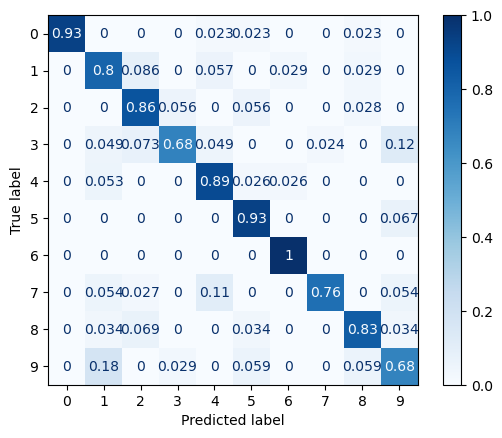

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=my_model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_model.classes_)
disp.plot(cmap=plt.cm.Blues)

The only number my model was able to recognize perfectly is 6.

# Q2

In [10]:
accuracies = []

for i in range(1, 41):
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
    my_model2 = DecisionTreeClassifier(max_depth=8, random_state=i, criterion="gini")
    my_model2.fit(X_train, y_train)
    y_pred2 = my_model2.predict(X_test)
    accuracy = sk.metrics.accuracy_score(y_test, y_pred2)
    accuracies.append(accuracy)
        
average_accuracy = np.mean(accuracies)
print("Average Accuracy:", average_accuracy)

std_accuracy = np.std(accuracies)
print("Average Standard Deviation:", std_accuracy)

Average Accuracy: 0.8469444444444445
Average Standard Deviation: 0.004068809730133298


# Q3

In [11]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
rf_classifier = sk.ensemble.RandomForestClassifier(max_depth=3,random_state=36,criterion="gini")
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

top_10_features = X.columns[sorted_indices[:10]]
normalized_gini_indices = feature_importances[sorted_indices[:10]]

feature_importances_df = pd.DataFrame({'Feature': top_10_features, 'Normalized Gini Index': normalized_gini_indices})
feature_importances_df

,Feature,Normalized Gini Index
0,pixel_2_5,0.089019
1,pixel_4_4,0.070038
2,pixel_4_1,0.065542
3,pixel_5_3,0.054033
4,pixel_3_4,0.047154
5,pixel_5_2,0.043324
6,pixel_3_2,0.042008
7,pixel_3_6,0.039280
8,pixel_6_5,0.035648
9,pixel_7_5,0.035483


# Q4

In [12]:
top_3_features = ['pixel_2_5', 'pixel_4_4', 'pixel_4_1']
X_top_3 = X[top_3_features]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_top_3, y, test_size=0.2, random_state=1)

rf_classifier = sk.ensemble.RandomForestClassifier(max_depth=3,random_state=36,criterion="gini")
rf_classifier.fit(X_train, y_train)
y_pred3 = rf_classifier.predict(X_test)
accuracy = sk.metrics.accuracy_score(y_test, y_pred3)

First_Model_Accuracy = np.mean(accuracies)
print("First Model Accuracy (All features):", First_Model_Accuracy)
print("Second Model Accuracy (Top 3 features):", accuracy)

First Model Accuracy (All features): 0.8469444444444445
Second Model Accuracy (Top 3 features): 0.5138888888888888


A. Yes, there is a difference between the 2 models, in the second model the accuracy is lower by almost 30% from the first model.
B. The prediction of the model is better than the baseline, the baseline is actually a stupid prediction, the probability of a correct answer - 0.1 therefore our prediction that is greater than 0.1 is better than the baseline.

----
# HW 5

# Q1

In [13]:
num_leaves = my_model.tree_.n_leaves
print("Number of leaves:", num_leaves)

Number of leaves: 79


# Q2

In [14]:
lst_accuracies = []

for i in range(1, 41):
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=i)
    my_model4 = DecisionTreeClassifier(max_depth=8, random_state=i, criterion="gini")
    my_model4.fit(X_train, y_train)
    y_pred4 = my_model4.predict(X_test)
    accuracy1 = sk.metrics.accuracy_score(y_test, y_pred4)
    lst_accuracies.append(accuracy1)
        
avr_accuracy = np.mean(lst_accuracies)
print("Average Accuracy:", avr_accuracy)

std_accuracy1 = np.std(lst_accuracies)
print("Average Standard Deviation:", std_accuracy1)
 
print("Q2: Average Accuracy:", average_accuracy)

print("Q2: Average Standard Deviation:", std_accuracy)

Average Accuracy: 0.8315277777777776
Average Standard Deviation: 0.0149501199696064
Q2: Average Accuracy: 0.8469444444444445
Q2: Average Standard Deviation: 0.004068809730133298


The STD of this model is higher, because the variance is greater, as more parameters are kept the same the standard deviation is preserved.

# Q3

In [15]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2,random_state=1)
rf_classifier1 = my_model
rf_classifier1.fit(X_train, y_train)

feature_importances1 = rf_classifier1.feature_importances_
sorted_indices1 = feature_importances1.argsort()[::-1]

top_10_features1 = X.columns[sorted_indices1[:10]]
normalized_gini_indices1 = feature_importances1[sorted_indices[:10]]

feature_importances_df1 = pd.DataFrame({'Feature': top_10_features1, 'Normalized Gini Index': normalized_gini_indices1})
feature_importances_df1

,Feature,Normalized Gini Index
0,pixel_5_2,0.089424
1,pixel_3_2,0.077302
2,pixel_2_5,0.064442
3,pixel_4_4,0.053529
4,pixel_4_1,0.008954
5,pixel_7_4,0.140853
6,pixel_0_5,0.102310
7,pixel_5_3,0.000000
8,pixel_3_3,0.007894
9,pixel_4_5,0.001636


The top 3 in the model of assignment 4 question 1 are: 'pixel_5_2', 'pixel_3_2', 'pixel_2_5'.

The top 3 in the model of assignment 4 question 3 are: 'pixel_2_5', 'pixel_4_4', 'pixel_4_1'.

These are hardly the same features,
Since we changed the features, the cuts are made in a different way, which leads the tree to prefer one part over the other and creates a different rank in each tree, therefore the top 3 varies from tree to tree.

# Q4

In [16]:
accuracy_lst = []
leaf_nodes_lst = []

for num_leaves in range(2, 102, 1):
    my_model5 = DecisionTreeClassifier(max_leaf_nodes=num_leaves, random_state=1,criterion="gini")
    my_model5.fit(X, y)
    accuracy5 = my_model5.score(X, y)
    accuracy_lst.append(accuracy5)
    leaf_nodes_lst.append(num_leaves)

data = pd.DataFrame({'Accuracy': accuracy_lst, 'Leaf Nodes': leaf_nodes_lst})

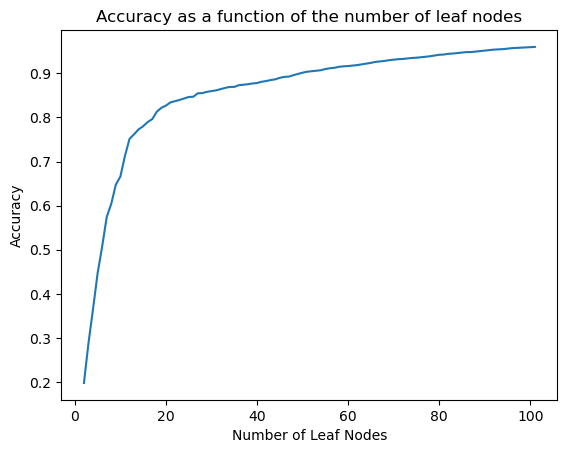

In [17]:
plt.plot(leaf_nodes_lst, accuracy_lst)
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the number of leaf nodes')
plt.show()
